# ***PART-I***

---







# MOUNTING GOOGLE DRIVE 

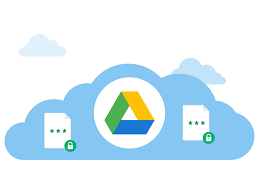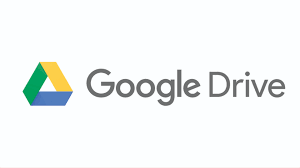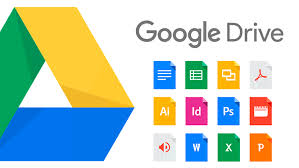

**THE GOOGLE DRIVE IS MOUNTED TO ACCESS THE FILES IN GOOGLE CLOUD**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os
import shutil
% matplotlib inline


# CREATING MAIN DIRECTORY

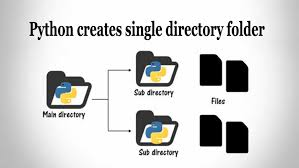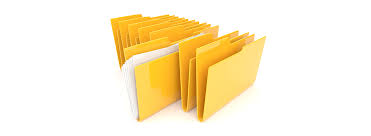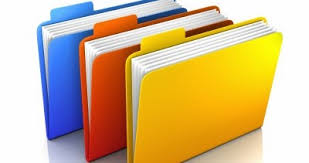

**CREATING DIRECTORIES TO SAVE THE RESULTS**

In [ ]:
path='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results'
try:
  os.mkdir(path)
except OSError:
  print ("Creation of the directory %s failed" % path)
else:
  print ("Successfully created the directory %s " % path)

# WEB SCRAPING

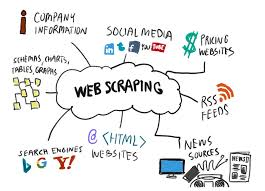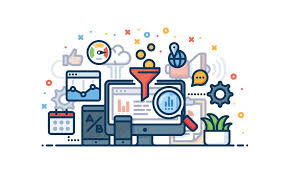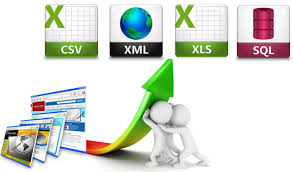

**EXTRACTING TICKER SYMBOLS FROM 5 ETF INDICES FOR COVID TOP 3 WINNING AND LOSING SECTORS** 

In [ ]:
%pip install fix_yahoo_finance 

In [ ]:
import fix_yahoo_finance as fyf
from pandas_datareader import data as pdr
fyf.pdr_override()

# FILTERING STOCK TICKERS FROM ETF INDICES

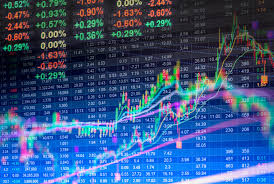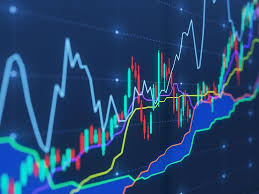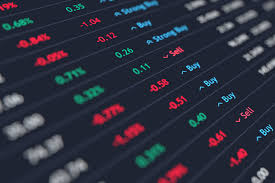

**EXTRACTED THE TABLES OF TICKERS FROM ETF INDICES,ONLY FILTERED THE DUPLICATES IN THE SECTOR AND SELECTED THE TOP 3** 

In [ ]:
T=['VGT','XLK','IYW','SKYY','FTEC']
CD=['XLY','VCR','FXD','IBUY','XRT']
HC=['XLV','VHT','IBB','IHI','FBT']
F=['VFH','FNCL','XLF','IYF','FAS']
U=['FUTY','XLU','VPU','IDU','FXU']
CS=['XLP','VDC','FSTA','KXI','RHS']
web='https://screener.fidelity.com/ftgw/etf/goto/snapshot/snapshot.jhtml?symbols='


In [ ]:
table=pd.DataFrame()
for x in T:
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
t=table[table.duplicated(keep=False)]
t=t.drop_duplicates()
if len(t)>3:
  t=t.iloc[0:3]
for x in range(3):
  t.iloc[x,0]=''.join(filter(str.isalpha,t.iloc[x,0]))
t

In [ ]:
table=pd.DataFrame()
for x in CD:
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
cd=table[table.duplicated(keep=False)]
cd=cd.drop_duplicates()
if len(cd)>3:
  cd=cd.iloc[0:3]
for x in range(3):
  cd.iloc[x,0]=''.join(filter(str.isalpha,cd.iloc[x,0]))
cd

In [ ]:
table=pd.DataFrame()
for x in HC:  
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
hc=table[table.duplicated(keep=False)]
hc=hc.drop_duplicates()
if len(hc)>3:
  hc=hc.iloc[0:3]
for x in range(3):
  hc.iloc[x,0]=''.join(filter(str.isalpha,hc.iloc[x,0]))
hc

In [ ]:
table=pd.DataFrame()
for x in F:
  ETFpayload = pd.read_html(web+x)
  if x=='FAS':
    table=pd.concat([table,ETFpayload[16].loc[0:2,0]],axis=0)
  else:
    table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
f=table[table.duplicated(keep=False)]
for x in range(len(f)):
  if f.iloc[x,0]=='BRK/B':
    f.iloc[x,0]=f.iloc[-1,0]
f=f.drop_duplicates()
if len(f)>3:
  f=f.iloc[0:3]
for x in range(3):
  f.iloc[x,0]=''.join(filter(str.isalpha,f.iloc[x,0]))
f

In [ ]:
table=pd.DataFrame()
for x in U:
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
u=table[table.duplicated(keep=False)]
u=u.drop_duplicates()
if len(u)>3:
  u=u.iloc[0:3]
for x in range(3):
  u.iloc[x,0]=''.join(filter(str.isalpha,u.iloc[x,0]))
u

In [ ]:
table=pd.DataFrame()
for x in CS:
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
cs=table[table.duplicated(keep=False)]
cs=cs.drop_duplicates()
if len(cs)>3:
  cs=cs.iloc[0:3]
for x in range(3):
  cs.iloc[x,0]=''.join(filter(str.isalpha,cs.iloc[x,0]))
cs

# SETTING DATA DIRECTORIES

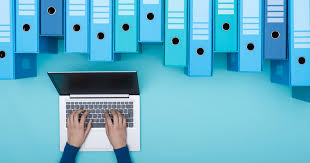 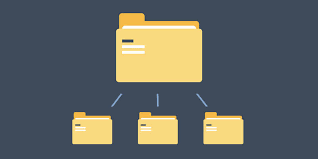 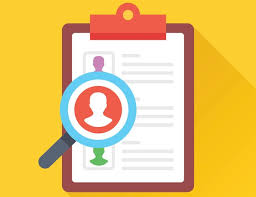

**DIRECTORIES FOR ALL SECTORS**

In [ ]:
def directory(df):
  if str(df)==str(t):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Technology/'
  elif str(df)==str(cd):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Consumer Discretionary/'
  elif str(df)==str(hc):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Healthcare/'
  elif str(df)==str(f):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Financials/'
  elif str(df)==str(u):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Utilities/'
  else:
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Consumer Staples/'
  return dir

# DATA EXTRACTION

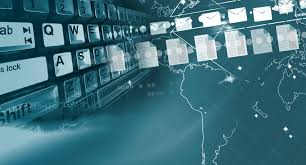 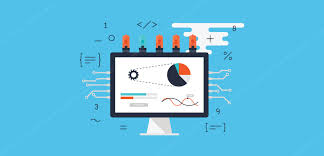 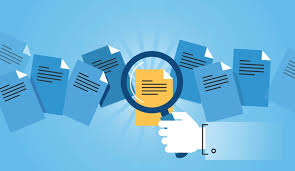

**DATA WAS EXTRACTED FROM YAHOO FINANCE DATABASE USING TICKERS**

In [ ]:
def dataextract(df):
  one=str(df.iloc[0,0])
  two=str(df.iloc[1,0])
  three=str(df.iloc[2,0])
  data1 = pdr.get_data_yahoo(one,start='2017-01-01')
  data2 = pdr.get_data_yahoo(two,start='2017-01-01')
  data3 = pdr.get_data_yahoo(three,start='2017-01-01')
  return data1,data2,data3,one,two,three

# DATA IMPUTATION



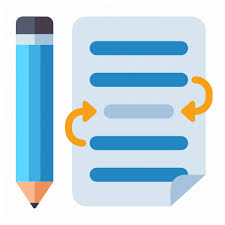 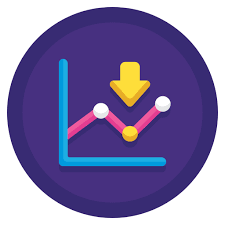 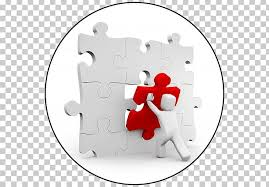

**DATA WAS IMPUTED FOR CONSISTENT STOCK DATA DAILY USING FORWARD FILL AND BACKWARD FILL**

In [ ]:
def dataimpute(data):
  dt = datetime.date(2017, 1, 1)
  end = datetime.date.today()-datetime.timedelta(days=2)
  day=pd.date_range(start=dt,end=end,freq='D')
  temp=pd.DataFrame(data=day,columns=['Date'])
  temp
  date=data.index
  for i in date:
      for x in range(len(temp)):
        if i==temp.loc[x,'Date']:
          temp.loc[x,'High']=data.loc[i,'High']
          temp.loc[x,'Low']=data.loc[i,'Low']
          temp.loc[x,'Open']=data.loc[i,'Open']
          temp.loc[x,'Close']=data.loc[i,'Close']
          temp.loc[x,'Adj Close']=data.loc[i,'Adj Close']
          temp.loc[x,'Volume']=data.loc[i,'Volume']
  #Imputation
  #temp=temp.interpolate(method="linear") #Another Method
  temp=temp.ffill()
  temp=temp.bfill()
  temp=temp.set_index('Date')  
  return temp



# DATA VISUALISATION

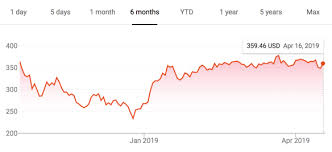 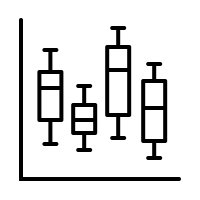 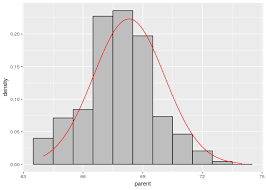

**DATA WAS PLOTTED AS LINE PLOTS,BOXPLOTS AND DENSITY PLOTS WITH HISTOGRAMS**

In [ ]:
#for setting figure size
from matplotlib.pylab import rcParams


In [ ]:
def graph(data,dir1,number,time):
   rcParams['figure.figsize'] = 20,10
   params = {'legend.fontsize': 'x-large',
            'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
   rcParams.update(params)

   figure, axes = plt.subplots(nrows=4, ncols=2,sharex=True)
   figure.subplots_adjust(hspace=0.4, wspace=0.4)
   x=list(data.index.values)
 
   axes[0,0].plot(x, data['Volume'], color='blue') 
   axes[0,0].set_title('VOLUME VERSUS DATE')
   #axes[0,0].set(xlabel='DATES',ylabel='VOLUME')
   

   axes[0,1].plot(x, data['High'], color='g')
   axes[0,1].plot(x, data['Low'], color='r')
   axes[0,1].plot(x, data['Open'], color='m')
   axes[0,1].plot(x, data['Close'], color='c')
   axes[0,1].plot(x, data['Adj Close'], color='y')
   axes[0,1].set_title('PRICES VERSUS DATE')
   #axes[0,1].set(xlabel='DATES',ylabel='PRICES')

   axes[1,0].plot(x, data['High'], color='g')
   axes[1,0].set_title('HIGH PRICES VERSUS DATE')
   #axes[1,0].set(xlabel='DATES',ylabel='HIGH PRICES')

   axes[1,1].plot(x, data['Low'], color='r')
   axes[1,1].set_title('LOW PRICES VERSUS DATE')
   #axes[1,1].set(xlabel='DATES',ylabel='LOW PRICES')

   axes[2,0].plot(x, data['Open'], color='m')
   axes[2,0].set_title('OPEN PRICES VERSUS DATE')
   #axes[2,0].set(xlabel='DATES',ylabel='OPEN PRICES')

   axes[2,1].plot(x, data['Close'], color='c')
   axes[2,1].set_title('CLOSE PRICES VERSUS DATE')
   #axes[2,1].set(xlabel='DATES',ylabel='CLOSE PRICES')

   axes[3,0].plot(x, data['Adj Close'], color='y',)
   #axes[3,0].set_xticklabels([])
   axes[3,0].set_title('ADJUSTED CLOSE PRICES VERSUS DATE')
   #axes[3,0].set(xlabel='DATES',ylabel='ADJUSTED CLOSE PRICES')
  
   axes[3,1].plot(x, data['Open'], color='m') 
   axes[3,1].plot(x, data['Close'], color='c')
   axes[3,1].plot(x, data['Adj Close'], color='y')
   #axes[3,1].set_xticklabels([])
   axes[3,1].set_title('OPEN,CLOSE AND PRICES VERSUS DATE')
   #axes[3,1].set(xlabel='DATES',ylabel='PRICES')

   figure.savefig(dir1+'/'+time+'/VOLUME AND PRICES GRAPH '+number+' '+time+'.png')
   plt.clf()
   
   figure, axes = plt.subplots(nrows=3, ncols=2,sharex=True)
   figure.subplots_adjust(hspace=0.4, wspace=0.4)
 
   sns.distplot(data['Volume'],ax=axes[0,0])
   axes[0,0].set_title('VOLUME')
  
   sns.distplot(data['High'],ax=axes[0,1])
   axes[0,1].set_title('HIGH PRICE')

   sns.distplot(data['Low'],ax=axes[1,0])
   axes[1,0].set_title('LOW PRICES')
  
   sns.distplot(data['Open'],ax=axes[1,1])
   axes[1,1].set_title('OPEN PRICES')

   sns.distplot(data['Close'],ax=axes[2,0])
   axes[2,0].set_title('CLOSE PRICES')

   sns.distplot(data['Adj Close'],ax=axes[2,1])
   axes[2,1].set_title('ADJUSTED CLOSE PRICES')  
  
   figure.savefig(dir1+'/'+time+'/DENSITY PLOTS '+number+' '+time+'.png')
   plt.clf()

   figure, axes = plt.subplots(nrows=3, ncols=2,sharex=True)
   figure.subplots_adjust(hspace=0.4, wspace=0.4)
 
   sns.boxplot(data['Volume'],ax=axes[0,0])
   axes[0,0].set_title('VOLUME')
  
   sns.boxplot(data['High'],ax=axes[0,1])
   axes[0,1].set_title('HIGH PRICE')

   sns.boxplot(data['Low'],ax=axes[1,0])
   axes[1,0].set_title('LOW PRICES')
  
   sns.boxplot(data['Open'],ax=axes[1,1])
   axes[1,1].set_title('OPEN PRICES')

   sns.boxplot(data['Close'],ax=axes[2,0])
   axes[2,0].set_title('CLOSE PRICES')

   sns.boxplot(data['Adj Close'],ax=axes[2,1])
   axes[2,1].set_title('ADJUSTED CLOSE PRICES')  
  
   figure.savefig(dir1+'/'+time+'/BOX PLOTS '+number+' '+time+ ".png")
   plt.clf()

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

# CORRELATION MATRIX AND PAIR PLOTS

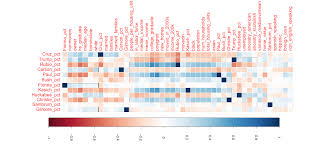 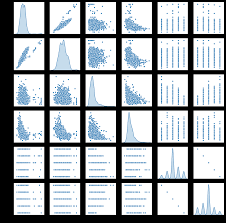 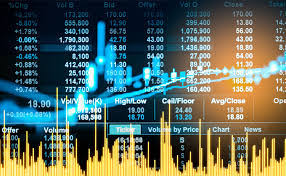

**PAIRPLOTS AND CORRELATION MATRIX  WERE PLOTTED.**

**A DETAILED REPORT WAS MADE USING  GUI ON THE FEATURE SELECTION PROCESS.**


>  **ONLY VOLUME CAN BE USED AS THERE IS SOME CORRELATION BETWEEN OUR TARGET,ADJUSTED CLOSE PRICE.**


>**REST OF THE VARIABLES COULD DERIVE OUR TARGET EASILY.**


> **NO MISSING VALUES IN THE DATASET**







In [ ]:
def datainspect(data,dir1,number,time):
  pp=sns.pairplot(data,height=2)
  pp.savefig(dir1 + "/"+time+ "/Pairplot new "+ number +" "+ time +  ".png")
  plt.clf()
  correlation_matrix = data.corr()
  sns.set(rc={'figure.figsize':(10,10)})
  sns_plot1=sns.heatmap(data=correlation_matrix, annot=True)
  fig = sns_plot1.get_figure()
  fig.savefig(dir1+"/"+time+"/Correlation matrix new "+number+" "+time+".png")
  plt.clf()
  profile=ProfileReport(data)
  profile.to_file(dir1+"/"+time+"/Report new "+number+" "+time+".html")

# DATA PREPROCESSING

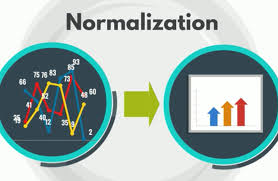 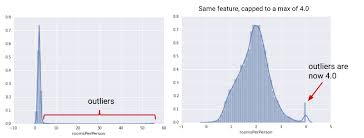 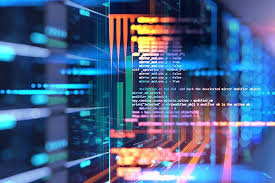 

**NORMALISATION WAS USED TO THE DATASET BECAUSE WE DIDN'T HAVE ANY OUTLIER IN THE DATASETS**




In [ ]:
def datapreprocess(data):
  scaler = MinMaxScaler(feature_range=(0, 1)) 
  scaled_values = scaler.fit_transform(data) 
  data.loc[:,:] = scaled_values
  return data


# DATA WRANGLING

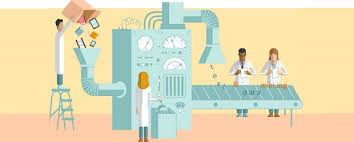 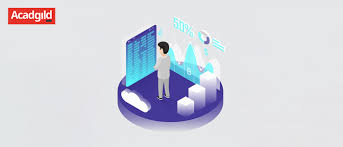 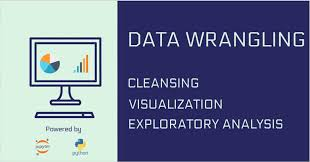

**ALL THE ABOVE FUNCTIONS WERE RUN ON 18 DATASETS USING THIS FUNCTION**

In [ ]:
def datawrangling(d):
  dir=directory(d)
  data1,data2,data3,one,two,three=dataextract(d)
  # define the name of the directory to be created
  comp=[one,two,three]
  for j in comp:
    p=dir
    q=j+"/"+"before"
    path=p+q
    try:
      os.makedirs(path)
    except OSError:
      print ("Creation of the directory %s failed" % path)
    else:
      print ("Successfully created the directory %s" % path)
    q=j+"/"+"after"
    path=p+q
    try:
      os.makedirs(path)
    except OSError:
      print ("Creation of the directory %s failed" % path)
    else:
      print ("Successfully created the directory %s" % path)
  data1=dataimpute(data1)
  data2=dataimpute(data2)
  data3=dataimpute(data3)
  dir1=os.path.join(dir, one)
  dir2=os.path.join(dir, two)
  dir3=os.path.join(dir, three)
  time='before'
  graph(data1,dir1,one,time)
  graph(data2,dir2,two,time)
  graph(data3,dir3,three,time)
  datainspect(data1,dir1,one,time)
  datainspect(data2,dir2,two,time)
  datainspect(data3,dir3,three,time)
  #datapreprocessing
  scaled_data1=datapreprocess(data1)
  scaled_data2=datapreprocess(data2)
  scaled_data3=datapreprocess(data3)
  time='after'
  graph(scaled_data1,dir2,two,time)
  graph(scaled_data1,dir3,three,time)
  datainspect(scaled_data1,dir1,one,time)
  datainspect(scaled_data2,dir2,two,time)
  datainspect(scaled_data3,dir3,three,time)
  


In [ ]:
#datawrangling(t)
#datawrangling(cd)
#datawrangling(hc)
#datawrangling(f)
#datawrangling(u)
#datawrangling(cs)


# ***PART-II***

---







# MODELING FUNCTIONS

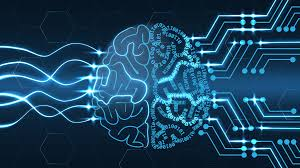 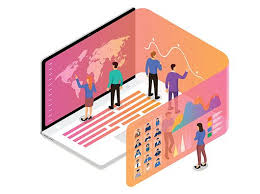 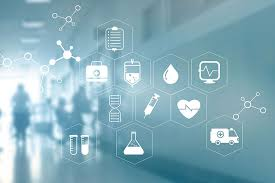

**FUNCTIONS WERE MADE FOR EACH MODEL TO GENERATE GRAPHS AND TRAIN,FIT AND TEST MODELS**

In [ ]:
from sklearn.model_selection import train_test_split

# DATASET PARTITION

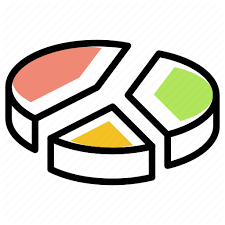 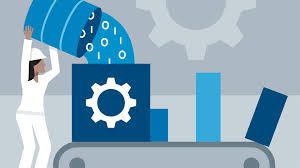 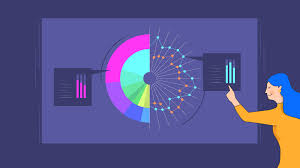

**DATA WAS PARTITIONED INTO TRAINING,VALIDATION AND TESTING SETS**

In [ ]:
def datapartition(d):
  dir=directory(d)
  data1,data2,data3,one,two,three=dataextract(d)
  # define the name of the directory to be created
  comp=[one,two,three]
  for j in comp:
    p=dir
    q=j+"/"+"model"
    path=p+q
    if not os.path.exists(path):
      os.makedirs(path)
    else:
      shutil.rmtree(path)           
      os.makedirs(path)
    #try:
      #os.makedirs(path)
    #except OSError:
      #print ("Creation of the directory %s failed" % path)
    #else:
      #print ("Successfully created the directory %s" % path)
  data1=dataimpute(data1)
  data2=dataimpute(data2)
  data3=dataimpute(data3)
  end = datetime.date.today()-datetime.timedelta(days=2)
  y1 = data1[['Adj Close']]
  X1 = data1[['Volume']]
  X1_data=X1.loc['2017-01-01':'2019-12-31',:]
  X1_test=X1.loc['2020-01-01':end,:]
  y1_data=y1.loc['2017-01-01':'2019-12-31',:]
  y1_test=y1.loc['2020-01-01':end,:]
  X1_norm=datapreprocess(X1_data)
  X1_test=datapreprocess(X1_test)
  X1_train, X1_val, y1_train, y1_val=train_test_split(X1_norm,y1_data,test_size=0.3,random_state=0)
  
  y2 = data2[['Adj Close']]
  X2 = data2[['Volume']]
  X2_data=X2.loc['2017-01-01':'2019-12-31',:]
  X2_test=X2.loc['2020-01-01':end,:]
  y2_data=y2.loc['2017-01-01':'2019-12-31',:]
  y2_test=y2.loc['2020-01-01':end,:]
  X2_norm=datapreprocess(X2_data)
  X2_train, X2_val, y2_train, y2_val=train_test_split(X2_data,y2_data,test_size=0.3,random_state=0)
  
  y3 = data3[['Adj Close']]
  X3 = data3[['Volume']]
  X3_data=X3.loc['2017-01-01':'2019-12-31',:]
  X3_test=X3.loc['2020-01-01':end,:]
  y3_data=y3.loc['2017-01-01':'2019-12-31',:]
  y3_test=y3.loc['2020-01-01':end,:]
  X3_norm=datapreprocess(X3_data)
  X3_train, X3_val, y3_train, y3_val=train_test_split(X3_data,y3_data,test_size=0.3,random_state=0)
  return X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,y1_data,y2_data,y3_data,X1,X2,X3,y1,y2,y3,one,two,three

In [ ]:
def plotdiff(test_data,predictions,dir,model):
  plt.plot(test_data.index, predictions, color='blue', linestyle='dashed',label='Predicted Price')
  plt.plot(test_data.index, test_data, color='red', label='Actual Adjusted Close Price')
  plt.title('Adjusted Close Price Prediction')
  plt.xlabel('Dates')
  plt.ylabel('Adjusted Close Prices')
  plt.legend()
  plt.savefig(dir + "/model"+"/"+ model +".png")
  plt.clf()
  return plt.show()

# LINEAR REGRESSION

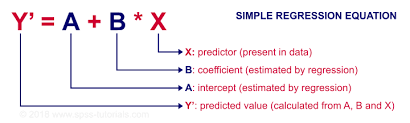

Linear regression quantifies the relationship between one or more predictor variable and one outcome variable. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
def linear(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  linear=LinearRegression()
  linear.fit(X1_train,y1_train)
  y1_pred1=linear.predict(X1_val)
  y1_pred=pd.DataFrame(linear.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse1=np.sqrt(mse)
  model="LINEAR REGRESSION"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse1


# LASSO REGRESSION

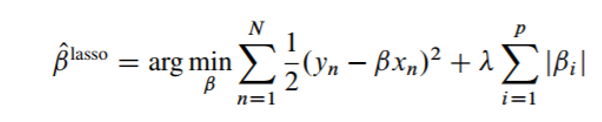
                           
                     

Lasso regression is a type of linear regression that uses shrinkage.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
def lasso(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  lasso=Lasso()
  lasso.fit(X1_train,y1_train)
  y1_pred1=lasso.predict(X1_val)
  y1_pred=pd.DataFrame(lasso.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse3=np.sqrt(mse)
  model="LASSO REGRESSION"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse3


# ELASTIC NET REGRESSION




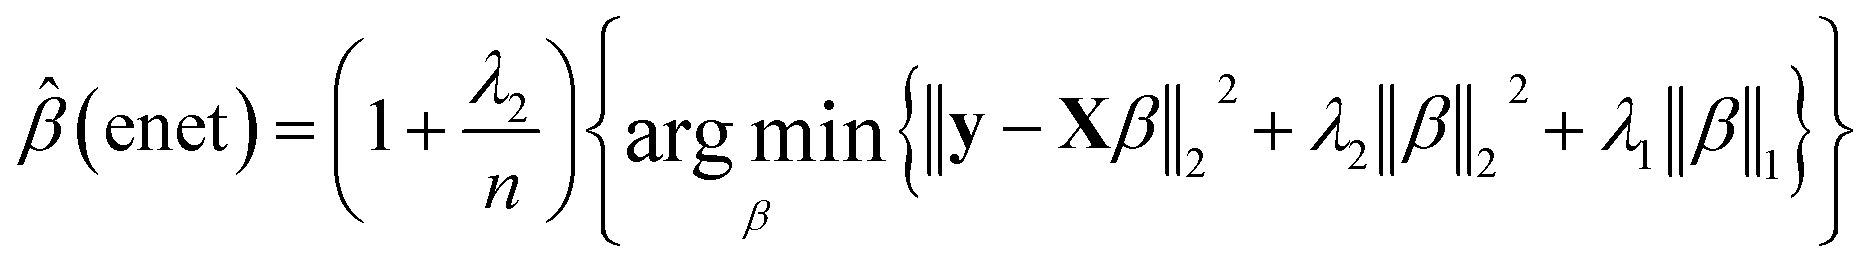

The Elastic Net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. 

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
def EN(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  EN=ElasticNet()
  EN.fit(X1_train,y1_train)
  y1_pred1=EN.predict(X1_val)
  y1_pred=pd.DataFrame(EN.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse4=np.sqrt(mse)
  model="ELASTIC NET REGRESSION"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse4

# DECISION TREE

![alt text](https://res.cloudinary.com/practicaldev/image/fetch/s--NOtmmf5a--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://twilio-cms-prod.s3.amazonaws.com/original_images/tree.gif)

Decision tree builds regression  models in the form of a tree structure.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def DT(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  DT=DecisionTreeRegressor()
  DT.fit(X1_train,y1_train)
  y1_pred1=DT.predict(X1_val)
  y1_pred=pd.DataFrame(DT.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse5=np.sqrt(mse)
  model="DECISION TREE"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse5

# KNN MODEL

![alt text](https://miro.medium.com/max/1280/1*b9BXv0uAkbSAn8MJIa4-_Q.gif)

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def KNN(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  KNN=KNeighborsRegressor()
  KNN.fit(X1_train,y1_train)
  y1_pred1=KNN.predict(X1_val)
  y1_pred=pd.DataFrame(KNN.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse6=np.sqrt(mse)
  model="KNN MODEL"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse6

# SVR MODEL

![alt text](https://www.semspirit.com//wp-content/uploads/sites/17154/2017/10/PY-SVR-model-capture-800x450-compress-50.gif)

 Support Vector Regression (SVR) applies the idea of SVM to predict real values rather than a class.

> SVR acknowledges the presence of non-linearity in the data and provides a proficient prediction model.



In [ ]:
from sklearn.svm import SVR

In [ ]:
def svm(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  svr=SVR()
  svr.fit(X1_train,y1_train)
  y1_pred1=svr.predict(X1_val)
  y1_pred=pd.DataFrame(svr.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse7=np.sqrt(mse)
  model="SVR MODEL"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse7

# SENTIMENT ANALYSIS

![alt text](https://thumbs.gfycat.com/EnchantedYellowishBarasinga-small.gif)

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns.

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
def Sentiment(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,sentiment,dir):
  X1_train.loc[:,'Sentiment']=sentiment
  X1_val.loc[:,'Sentiment']=sentiment
  X1_test.loc[:,'Sentiment']=sentiment
  clf = MLPRegressor()
  clf.fit(X1_train, y1_train)
  y1_pred1=clf.predict(X1_val)
  y1_pred=pd.DataFrame(clf.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse7=np.sqrt(mse)
  model="SENTIMENT ANALYSIS"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse7

# ENSEMBLE MODELS

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

![alt text](https://miro.medium.com/max/1280/1*9kACduxnce_JdTrftM_bsA.gif)

In [ ]:
def E1(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  clf = RandomForestRegressor()
  clf.fit(X1_train, y1_train)
  y1_pred1=clf.predict(X1_val)
  y1_pred=pd.DataFrame(clf.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse7=np.sqrt(mse)
  model="RANDOM FOREST REGRESSOR"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse7

![alt text](https://miro.medium.com/max/900/1*IFoOIqlshjtQ34BpsLsIrg.gif)

In [ ]:
def E2(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  clf = GradientBoostingRegressor()
  clf.fit(X1_train, y1_train)
  y1_pred1=clf.predict(X1_val)
  y1_pred=pd.DataFrame(clf.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse7=np.sqrt(mse)
  model="GRADIENT BOOSTING REGRESSOR"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse7

In [ ]:
def E3(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  clf = AdaBoostRegressor()
  clf.fit(X1_train, y1_train)
  y1_pred1=clf.predict(X1_val)
  y1_pred=pd.DataFrame(clf.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse7=np.sqrt(mse)
  model="ADA BOOST REGRESSOR"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse7

![alt text](https://thumbs.gfycat.com/RigidFantasticBlackfly-size_restricted.gif)

In [ ]:
def E4(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir):
  clf = ExtraTreesRegressor()
  clf.fit(X1_train, y1_train)
  y1_pred1=clf.predict(X1_val)
  y1_pred=pd.DataFrame(clf.predict(X1_test))
  mse=metrics.mean_squared_error(y1_val,y1_pred1)
  rmse7=np.sqrt(mse)
  model="EXTRA TREES REGRESSOR"
  plotdiff(y1_test,y1_pred,dir,model)
  return y1_pred,rmse7

# TIME SERIES MODELS 

![alt text](https://i.pinimg.com/originals/57/2f/8c/572f8cbe4c9f69c217bdc33b82eb0c28.gif)

# TIME SERIES PARTITION


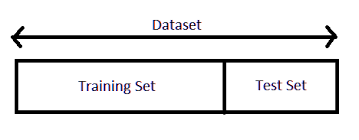

**DATA WAS PARTITIONED AS TRAINING SET(2017-2019) AND TEST SET(2020)**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf  #autocorrelation
from statsmodels.tsa.stattools import adfuller as ADF  # stable test
from statsmodels.graphics.tsaplots import plot_pacf    #pacf
from statsmodels.stats.diagnostic import acorr_ljungbox    #white noise
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def testarima(d):
  data1,data2,data3,one,two,three=dataextract(d)
  data1=dataimpute(data1)
  data2=dataimpute(data2)
  data3=dataimpute(data3)
  data1=data1.loc[:,'Adj Close']
  data2=data2.loc[:,'Adj Close']
  data3=data3.loc[:,'Adj Close']
  train_data1, test_data1 =data1[0:int(len(data1)*0.7)], data1[int(len(data1)*0.7)-1:]
  train_data2, test_data2 =data2[0:int(len(data2)*0.7)], data2[int(len(data2)*0.7)-1:]
  train_data3, test_data3 =data3[0:int(len(data3)*0.7)], data3[int(len(data3)*0.7)-1:]
  return train_data1,train_data2,train_data3,test_data1,test_data2,test_data3,one,two,three

In [ ]:
def plotarima(train_data,test_data,dir):
  plt.figure(figsize=(12,7))
  plt.title('Prices')
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.plot(train_data,color='blue', label='Training Data')
  plt.plot(test_data,color='green', label='Testing Data')
  plt.legend()
  plt.savefig(dir +"/model"+ "/Time Series Partition graph.png")
  return plt.show()

# STATIONARITY TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries,dir):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    plt.style.use('seaborn')
    rcParams['figure.figsize'] = 20,10
    orig = plt.plot(timeseries,label='Original')
    mean = plt.plot(rolmean, label='Rolling Mean')
    std = plt.plot(rolstd, label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    temp1=pd.DataFrame(dfoutput)
    temp1.to_csv(dir+"/model"+"/Results of Dickey-Fuller Test.csv")
    return temp1


# WHITE NOISE TEST

In [ ]:
def whitenoisetest(train1,dir):
  temp2=acorr_ljungbox(train1,lags=1)
  temp2=pd.DataFrame(temp2)
  temp2.to_csv(dir+"/model"+"/Results of White  Test <0.05 stable and not white noise.csv")
  return temp2
  
#<0.05 stable and not white noise

# ACF and PACF

In [ ]:
def ACF(train_data,dir):
  D_df = train_data.diff(periods=1).dropna()
  D_df.columns = ['df1 diff']
  ADF_df_p=ADF(D_df)
  plot_pacf(D_df)
  plt.savefig(dir +"/model"+ "/pacf graph.png")
  plt.clf()
  plot_acf(D_df)
  plt.savefig(dir +"/model"+ "/acf graph.png")
  plt.clf()
  title="p-value of original sequence adf test is " +str(ADF_df_p)
  return title


# MA MODEL

![alt text](https://miro.medium.com/max/1200/1*8GeFfU9itlpiz_DjQzX3uw.gif)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
!pip install pyramid-arima
from pyramid.arima import auto_arima
import math

In [ ]:
def ma(train,test,dir):
  preds = []
  for i in range(0,test.shape[0]):
    x = train[len(train)-test.shape[0]+i:].sum() + sum(preds)
    y = x/test.shape[0]
    preds.append(y)
  # checking the results (RMSE value)
  rmse=sqrt(mean_squared_error(test,preds))
  plt.plot(train,color='green', label='Training Data')
  plt.plot(test.index, preds, marker='o', linestyle='dashed', 
          label='Predicted Price')
  plt.plot(test.index, test, color='red', label='Actual Price')
  plt.title('Price Prediction')
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.legend()
  plt.savefig(dir +"/model"+ "/MA MODEL.png")
  plt.clf
  preds=pd.DataFrame(preds)
  return preds,rmse


# ARIMA MODEL

![alt text](https://miro.medium.com/max/1260/1*GFGJDj5ULD1JgHiq6CvH6A.gif)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def armodel(train_data,test_data,dir):
  try:
    aa=auto_arima(train_data, start_p=1, start_q=1, max_p=3, max_q=3,m=12,start_P=1,start_Q=1,seasonal=True,d=1, D=1, trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True)
    train_ar = train_data.values
    test_ar = test_data.values
    history = [x for x in train_ar]
    print(history)
    predictions = list()
    for t in range(len(test_ar)):
      model = ARIMA(history,order=(aa.order))
      model_fit = model.fit()
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test_ar[t]
      history.append(obs)
    error = mean_squared_error(test_ar, predictions)
    rmse=sqrt(error)
    plt.plot(train_data,color='green', label='Training Data')
    plt.plot(test_data.index, predictions, marker='o', linestyle='dashed', 
    label='Predicted Price')
    plt.plot(test_data.index, test_data, color='red', label='Actual Price')
    plt.title('Price Prediction')
    plt.xlabel('Dates')
    plt.ylabel('Prices')
    plt.legend()
    plt.savefig(dir +"/model"+ "/ARIMA MODEL.png")
    plt.clf
  except ValueError:
     a = np.zeros(shape=(len(test_data),1)) #Bad performing model
     predictions=pd.DataFrame(a)
     #d1=[test_data.mean()]*(len(test_data)) #Better bad performing model but we don't want it to be best
     #predictions=pd.DataFrame(d1)
     error = mean_squared_error(test_ar, predictions)
     rmse=sqrt(error)
     return predictions,rmse 
  else:
     predictions=pd.DataFrame(predictions)
     return predictions,rmse

# COMPARING MODELS

![alt text](https://media3.giphy.com/media/sRFEa8lbeC7zbcIZZR/giphy.gif)

**WE CHOSE THE BEST MODEL THAT FITS BY TAKING THE LOWEST RMSE VALUE.**






In [ ]:
def models1(d):
  X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,y1_data,y2_data,y3_data,X1,X2,X3,y1,y2,y3,one,two,three=datapartition(d)
  
  dir=directory(d)
  dir1=dir+"/"+one
  y_pred11,rmse11=linear(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  y_pred13,rmse13=lasso(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  y_pred14,rmse14=EN(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  y_pred15,rmse15=DT(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  y_pred16,rmse16=KNN(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  y_pred17,rmse17=svm(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  y_pred18,rmse18=Sentiment(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,10,dir1)
  y_pred19,rmse19=E1(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  y_pred110,rmse110=E2(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  y_pred111,rmse111=E3(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  y_pred112,rmse112=E4(X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,dir1)
  
  dir2=dir+"/"+two
  y_pred21,rmse21=linear(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred23,rmse23=lasso(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred24,rmse24=EN(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred25,rmse25=DT(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred26,rmse26=KNN(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred27,rmse27=svm(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred28,rmse28=Sentiment(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,9,dir2)
  y_pred29,rmse29=E1(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred210,rmse210=E2(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred211,rmse211=E3(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred212,rmse212=E4(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  
  dir3=dir+"/"+three
  y_pred31,rmse31=linear(X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,dir3)
  y_pred33,rmse33=lasso(X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,dir3)
  y_pred34,rmse34=EN(X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,dir3)
  y_pred35,rmse35=DT(X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,dir3)
  y_pred36,rmse36=KNN(X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,dir3)
  y_pred37,rmse37=svm(X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,dir3)
  y_pred38,rmse38=Sentiment(X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,8,dir3)
  y_pred39,rmse39=E1(X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,dir3)
  y_pred310,rmse310=E2(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred311,rmse311=E3(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)
  y_pred312,rmse312=E4(X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,dir2)

  return  y_pred11,rmse11,y_pred13,rmse13,y_pred14,rmse14,y_pred15,rmse15,y_pred16,rmse16,y_pred17,rmse17,y_pred18,rmse18,y_pred19,rmse19,y_pred110,rmse110,y_pred111,rmse111,y_pred112,rmse112,y_pred21,rmse21,y_pred23,rmse23,y_pred24,rmse24,y_pred25,rmse25,y_pred26,rmse26,y_pred27,rmse27,y_pred28,rmse28,y_pred29,rmse29,y_pred210,rmse210,y_pred211,rmse211,y_pred212,rmse212,y_pred31,rmse31,y_pred33,rmse33,y_pred34,rmse34,y_pred35,rmse35,y_pred36,rmse36,y_pred37,rmse37,y_pred38,rmse38,y_pred39,rmse39,y_pred310,rmse310,y_pred311,rmse311,y_pred312,rmse312






In [ ]:
def models2(d):
  train1,train2,train3,test1,test2,test3,one,two,three=testarima(d)
  dir=directory(d)
  dir1=dir+"/"+one
  plotarima(train1,test1,dir1)
  t1=test_stationarity(train1,dir1) 
  w1=whitenoisetest(train1,dir1)
  title1=ACF(train1,dir1)
  print(title1)
  pred11,rm11=armodel(train1,test1,dir1)
  pred12,rm12=ma(train1,test1,dir1)

  dir2=dir+"/"+two
  plotarima(train2,test2,dir2)
  t2=test_stationarity(train2,dir2)
  w2=whitenoisetest(train2,dir2)
  title2=ACF(train2,dir2)
  print(title2)
  pred21,rm21=armodel(train2,test2,dir2)
  pred22,rm22=ma(train2,test2,dir2)
  
  dir3=dir+"/"+three
  plotarima(train3,test3,dir3)
  t3=test_stationarity(train3,dir3)
  w3=whitenoisetest(train3,dir3)
  title3=ACF(train3,dir3)
  print(title3)
  pred31,rm31=armodel(train3,test3,dir3)
  pred32,rm32=ma(train3,test3,dir3)
  return pred11,rm11,pred12,rm12,pred21,rm21,pred22,rm22,pred31,rm31,pred32,rm32


# Residuals Comparision

 **WE ALSO CHECKED THE SPREAD OF RESIDUALS OF MODELS BY BOXPLOTS**

In [ ]:
def box(y1_test,y_pred11,y_pred13,y_pred14,y_pred15,y_pred16,y_pred17,y_pred18,y_pred19,y_pred110,y_pred111,y_pred112,pred11,pred12,dir1):
  y1_test=y1_test.reset_index()
  linear=np.subtract(y1_test.loc[:,'Adj Close'],y_pred11.loc[:,0])
  lasso=np.subtract(y1_test.loc[:,'Adj Close'],y_pred13.loc[:,0])
  en=np.subtract(y1_test.loc[:,'Adj Close'],y_pred14.loc[:,0])
  dt=np.subtract(y1_test.loc[:,'Adj Close'],y_pred15.loc[:,0])
  knn=np.subtract(y1_test.loc[:,'Adj Close'],y_pred16.loc[:,0])
  svr=np.subtract(y1_test.loc[:,'Adj Close'],y_pred17.loc[:,0])
  nn=np.subtract(y1_test.loc[:,'Adj Close'],y_pred18.loc[:,0])
  e1=np.subtract(y1_test.loc[:,'Adj Close'],y_pred19.loc[:,0])
  e2=np.subtract(y1_test.loc[:,'Adj Close'],y_pred110.loc[:,0])
  e3=np.subtract(y1_test.loc[:,'Adj Close'],y_pred111.loc[:,0])
  e4=np.subtract(y1_test.loc[:,'Adj Close'],y_pred112.loc[:,0])
  ar=np.subtract(y1_test.loc[:,'Adj Close'],pred11.loc[:,0])
  ma=np.subtract(y1_test.loc[:,'Adj Close'],pred12.loc[:,0])

  ar=ar[np.logical_not(np.isnan(ar))] 
  ma=ma[np.logical_not(np.isnan(ma))]

  residuals=pd.DataFrame()
  residuals=pd.concat([linear,lasso,en,dt,knn,svr,nn,e1,e2,e3,e4,ar,ma],axis=1)
  residuals.columns=['LINEAR REGRESSION','LASSO REGRESSION','ELASTIC NET REGRESSION','DECISION TREE','KNN MODEL','SVR MODEL','SENTIMENT ANALYSIS','RANDOM FOREST REGRESSOR','GRADIENT BOOST REGRESSOR','ADA BOOST REGRESSOR','EXTRA TREES REGRESSOR','ARIMA MODEL','MA MODEL']

  data=[linear,lasso,en,dt,knn,svr,nn,e1,e2,e3,e4,ar,ma]  
  #building figure
  fig = plt.figure()
  fig.suptitle('Residuals Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot(data)
  ax.set_xticklabels(residuals.columns)
  plt.xticks(rotation='vertical')

  plt.savefig(dir1 + "/model"+"/Residuals Comparision"+".png")
  return plt.clf()

In [ ]:
def compare(rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9,rmse10,rmse11,rmse12,rmse13):
  rmse=pd.DataFrame()
  rmse['Model']=['LINEAR REGRESSION','LASSO REGRESSION','ELASTIC NET REGRESSION','DECISION TREE','KNN MODEL','SVR MODEL','SENTIMENT ANALYSIS','RANDOM FOREST REGRESSOR','GRADIENT BOOST REGRESSOR','ADA BOOST REGRESSOR','EXTRA TREES REGRESSOR','ARIMA MODEL','MA MODEL']
  rmse['RMSE']=[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9,rmse10,rmse11,rmse12,rmse13]
  l=np.min(rmse["RMSE"])
  for i in range(len(rmse)):
      if l==rmse.iloc[i]['RMSE']:
        best=rmse.iloc[i]["Model"]
  return l,best


In [ ]:
def finalmodel(d):
  X1_train,X1_val,X1_test,y1_train,y1_val,y1_test,X2_train,X2_val,X2_test,y2_train,y2_val,y2_test,X3_train,X3_val,X3_test,y3_train,y3_val,y3_test,y1_data,y2_data,y3_data,X1,X2,X3,y1,y2,y3,one,two,three=datapartition(d)
  y_pred11,rmse11,y_pred13,rmse13,y_pred14,rmse14,y_pred15,rmse15,y_pred16,rmse16,y_pred17,rmse17,y_pred18,rmse18,y_pred19,rmse19,y_pred110,rmse110,y_pred111,rmse111,y_pred112,rmse112,y_pred21,rmse21,y_pred23,rmse23,y_pred24,rmse24,y_pred25,rmse25,y_pred26,rmse26,y_pred27,rmse27,y_pred28,rmse28,y_pred29,rmse29,y_pred210,rmse210,y_pred211,rmse211,y_pred212,rmse212,y_pred31,rmse31,y_pred33,rmse33,y_pred34,rmse34,y_pred35,rmse35,y_pred36,rmse36,y_pred37,rmse37,y_pred38,rmse38,y_pred39,rmse39,y_pred310,rmse310,y_pred311,rmse311,y_pred312,rmse312=models1(d)

  train_data1,train_data2,train_data3,test_data1,test_data2,test_data3,one,two,three=testarima(d)
  pred11,rm11,pred12,rm12,pred21,rm21,pred22,rm22,pred31,rm31,pred32,rm32=models2(d)

  dir=directory(d) 

  dir1=dir+"/"+one
  l,best=compare(rmse11,rmse13,rmse14,rmse15,rmse16,rmse17,rmse18,rmse19,rmse110,rmse111,rmse112,rm11,rm12)
  box(y1_test,y_pred11,y_pred13,y_pred14,y_pred15,y_pred16,y_pred17,y_pred18,y_pred19,y_pred110,y_pred111,y_pred112,pred11,pred12,dir1)
  model="Best model is "+best
  
  if l==rmse11:
    plotdiff(y1_test,y_pred11,dir1,model)
  elif l==rmse13:
    plotdiff(y1_test,y_pred13,dir1,model)
  elif l==rmse14:
    plotdiff(y1_test,y_pred14,dir1,model)
  elif l==rmse15:
    plotdiff(y1_test,y_pred15,dir1,model)
  elif l==rmse16:
    plotdiff(y1_test,y_pred16,dir1,model)
  elif l==rmse17:
    plotdiff(y1_test,y_pred17,dir1,model)
  elif l==rmse18:
    plotdiff(y1_test,y_pred18,dir1,model)
  elif l==rmse19:
    plotdiff(y1_test,y_pred19,dir1,model)
  elif l==rmse110:
    plotdiff(y1_test,y_pred110,dir1,model)
  elif l==rmse111:
    plotdiff(y1_test,y_pred111,dir1,model)
  elif l==rmse112:
    plotdiff(y1_test,y_pred112,dir1,model)
  elif l==rm11:
    plotdiff(test_data1,pred11,dir1,model)
  elif l==rm12:
    plotdiff(test_data1,pred12,dir1,model)
  else:
    print("Error")
  
  dir2=dir+"/"+two
  l,best=compare(rmse21,rmse23,rmse24,rmse25,rmse26,rmse27,rmse28,rmse29,rmse210,rmse211,rmse212,rm21,rm22)
  box(y2_test,y_pred21,y_pred23,y_pred24,y_pred25,y_pred26,y_pred27,y_pred28,y_pred29,y_pred210,y_pred211,y_pred212,pred21,pred22,dir2)
  model="Best model is "+best
  
  if l==rmse21:
    plotdiff(y2_test,y_pred21,dir2,model)
  elif l==rmse23:
    plotdiff(y2_test,y_pred23,dir2,model)
  elif l==rmse24:
    plotdiff(y2_test,y_pred24,dir2,model)
  elif l==rmse25:
    plotdiff(y2_test,y_pred25,dir2,model)
  elif l==rmse26:
    plotdiff(y2_test,y_pred26,dir2,model)
  elif l==rmse27:
    plotdiff(y2_test,y_pred27,dir2,model)
  elif l==rmse28:
    plotdiff(y2_test,y_pred28,dir2,model)
  elif l==rmse29:
    plotdiff(y2_test,y_pred29,dir2,model)
  elif l==rmse210:
    plotdiff(y2_test,y_pred210,dir2,model)
  elif l==rmse211:
    plotdiff(y2_test,y_pred211,dir2,model)
  elif l==rmse212:
    plotdiff(y2_test,y_pred212,dir2,model)
  elif l==rm21:
    plotdiff(test_data2,pred21,dir2,model)
  elif l==rm22:
    plotdiff(test_data2,pred22,dir2,model)
  else:
    print("Error")
  dir3=dir+"/"+three
  l,best=compare(rmse31,rmse33,rmse34,rmse35,rmse36,rmse37,rmse38,rmse39,rmse310,rmse311,rmse312,rm31,rm32)
  box(y3_test,y_pred31,y_pred33,y_pred34,y_pred35,y_pred36,y_pred37,y_pred38,y_pred39,y_pred310,y_pred311,y_pred312,pred31,pred32,dir3)
  model="Best model is "+best
  
  if l==rmse31:
    plotdiff(y3_test,y_pred31,dir3,model)
  elif l==rmse33:
    plotdiff(y3_test,y_pred33,dir3,model)
  elif l==rmse34:
    plotdiff(y3_test,y_pred34,dir3,model)
  elif l==rmse35:
    plotdiff(y3_test,y_pred35,dir3,model)
  elif l==rmse36:
    plotdiff(y3_test,y_pred36,dir3,model)
  elif l==rmse37:
    plotdiff(y3_test,y_pred37,dir3,model)
  elif l==rmse38:
    plotdiff(y3_test,y_pred38,dir3,model)
  elif l==rmse39:
    plotdiff(y3_test,y_pred39,dir3,model)
  elif l==rmse310:
    plotdiff(y3_test,y_pred310,dir3,model)
  elif l==rmse311:
    plotdiff(y3_test,y_pred311,dir3,model)
  elif l==rmse312:
    plotdiff(y3_test,y_pred312,dir3,model)
  elif l==rm31:
    plotdiff(test_data3,pred31,dir3,model)
  elif l==rm32:
    plotdiff(test_data3,pred32,dir3,model)
  else:
    print("Error")


In [ ]:
#finalmodel(t)

In [ ]:
#finalmodel(cd)

In [ ]:
#finalmodel(hc)

In [ ]:
#finalmodel(f)

In [ ]:
#finalmodel(u)

In [ ]:
#finalmodel(cs)

# ***PART-III***

---







# **RESULTS**

![alt text](https://thedarkside.frantzmiccoli.com/res/metatrader.gif)

In [ ]:
years=1           #enter number of years
date='2020-01-01' #date 
pay=1000000       #payment=1 million dollars


In [ ]:
%pip install numpy-financial

In [ ]:
import numpy_financial as npf

In [ ]:
def zombie(df):
  data=df['Adj Close']
  returns=pd.DataFrame.pct_change(data)
  for i in range(len(data)):
    if returns[i]<-10000:
      p="May be a Potential Zombie Company"
      for j in range(i,len(data),1):
        if returns[j]<=returns[i]:
          continue
        else:
          p="Not a Potential Zombie Company"
          break
    else:
      p="Not a Potential Zombie Company"
  return p  

In [ ]:
def results(years,date,pay,d):
  data1,data2,data3,one,two,three=dataextract(d)
  dir=directory(d)
  data1=dataimpute(data1)
  data2=dataimpute(data2)
  data3=dataimpute(data3)
  dir1=os.path.join(dir, one)
  dir2=os.path.join(dir, two)
  dir3=os.path.join(dir, three)
  p1=zombie(data1)
  p2=zombie(data2)
  p3=zombie(data3)
  df1=data1['Adj Close']
  df2=data2['Adj Close']
  df3=data3['Adj Close']
  pv1=npf.pv(nper=years,pmt=pay,rate=0.12,fv=df1.loc[date])
  pv2=npf.pv(nper=years,pmt=pay,rate=0.12,fv=df2.loc[date])
  pv3=npf.pv(nper=years,pmt=pay,rate=0.12,fv=df3.loc[date])
  npv1=npf.npv(rate=0.12,values=df1)
  npv2=npf.npv(rate=0.12,values=df2)
  npv3=npf.npv(rate=0.12,values=df3)
  df1=df1.to_numpy()
  df2=df2.to_numpy()
  df3=df3.to_numpy()
  irr1=npf.irr(df1)
  irr2=npf.irr(df2)
  irr3=npf.irr(df3)
  irr1=np.nan_to_num(0.12)
  irr2=np.nan_to_num(0.12)
  irr3=np.nan_to_num(0.12)
  roi1=npv1/pay 
  roi2=npv2/pay
  roi3=npv3/pay
  p1=zombie(data1)
  p2=zombie(data2)
  p3=zombie(data3)
  
  elements=['Ticker Symbol','Whether Zombie or not:','Present Value after 1 year if invested $1M on 2020-01-01:','Net Present Value at 12% Discount Rate:','Internal Rate of Return:','Return of Investment:']
  a1=[one,p1,pv1,npv1,irr1,roi1]
  a2=[two,p2,pv2,npv2,irr2,roi2]
  a3=[three,p3,pv3,npv3,irr3,roi3]
  b1=data1.describe()
  b2=data2.describe()
  b3=data3.describe()

  pf1=pd.DataFrame(elements,columns=['Info'])
  pf1['Answer']=a1
  pf1=pf1.append(b1)
  pf1.to_excel(dir1+"/"+one+" Financial Portfolio Report.xlsx")
  
  pf2=pd.DataFrame(elements,columns=['Info'])
  pf2['Answer']=a2
  pf2=pf2.append(b2)
  pf2.to_excel(dir2+"/"+two+" Financial Portfolio Report.xlsx")

  pf3=pd.DataFrame(elements,columns=['Info'])
  pf3['Answer']=a3
  pf3=pf3.append(b3)
  pf3.to_excel(dir3+"/"+three+" Financial Portfolio Report.xlsx")










In [ ]:
#results(years,date,pay,t)
#results(years,date,pay,cd)
#results(years,date,pay,hc)
#results(years,date,pay,f)
#results(years,date,pay,u)
#results(years,date,pay,cs)

                                   

---



# Future Scope for this Project







> Improve Space and Time Complexity of the Algorithm






> More Variables like Alternative Data,Company Account Details,Sentiment etc

> Results for all Stocks Companies

> Comparison of different company stock information

> Giving more suggestions or results using financial information

> More assured stock data from other API using API key

> Making  a software or app using GUI

> Making a package to generate results as report in GitHub

> Tuning more timeseries models and other models


















![alt text](https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/0642e775239417.5e4ba3436decf.gif)